In [1]:
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))
# statsmodels
import statsmodels
print('statsmodels: {}'.format(statsmodels.__version__))

scipy: 1.1.0
numpy: 1.15.4
matplotlib: 3.0.2
pandas: 0.23.4
sklearn: 0.21.3
statsmodels: 0.9.0


In [19]:
import matplotlib.pyplot as plt

In [8]:
data = pandas.read_csv('robberies.csv', header=0)

In [9]:
data.head()

,Month,Robberies
0,1966-01,41
1,1966-02,39
2,1966-03,50
3,1966-04,40
4,1966-05,43


In [2]:
series = Series.from_csv('robberies.csv', header=0) 
split_point = len(series) - 12 
dataset, validation = series[0:split_point], series[split_point:]

C:\Users\mxcsy\Anaconda3\lib\site-packages\pandas\core\series.py:3727: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


In [6]:
series.head()

Month
1966-01-01    41
1966-02-01    39
1966-03-01    50
1966-04-01    40
1966-05-01    43
Name: Robberies, dtype: int64

In [4]:
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv')
validation.to_csv('validation.csv')

Dataset 106, Validation 12


In [5]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def evaluate(test, predictions):
    mse = mean_squared_error(test, predictions)
    rmse = sqrt(mse)
    print('RMSE: %.3f' % rmse)

## Baseline Model

In [10]:
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

In [14]:
history = [x for x in train]
predictions = list()

In [15]:
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))

>Predicted=174.000, Expected=178
>Predicted=178.000, Expected=136
>Predicted=136.000, Expected=161
>Predicted=161.000, Expected=171
>Predicted=171.000, Expected=149
>Predicted=149.000, Expected=184
>Predicted=184.000, Expected=155
>Predicted=155.000, Expected=276
>Predicted=276.000, Expected=224
>Predicted=224.000, Expected=213
>Predicted=213.000, Expected=279
>Predicted=279.000, Expected=268
>Predicted=268.000, Expected=287
>Predicted=287.000, Expected=238
>Predicted=238.000, Expected=213
>Predicted=213.000, Expected=257
>Predicted=257.000, Expected=293
>Predicted=293.000, Expected=212
>Predicted=212.000, Expected=246
>Predicted=246.000, Expected=353
>Predicted=353.000, Expected=339
>Predicted=339.000, Expected=308
>Predicted=308.000, Expected=247
>Predicted=247.000, Expected=257
>Predicted=257.000, Expected=322
>Predicted=322.000, Expected=298
>Predicted=298.000, Expected=273
>Predicted=273.000, Expected=312
>Predicted=312.000, Expected=249
>Predicted=249.000, Expected=286
>Predicted

In [16]:
evaluate(test, predictions)

RMSE: 54.191


## Data Summary

In [17]:
series = pandas.Series.from_csv('dataset.csv')
print(series.describe())

C:\Users\mxcsy\Anaconda3\lib\site-packages\pandas\core\series.py:3727: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


count    106.000000
mean     173.103774
std      112.231133
min       29.000000
25%       74.750000
50%      144.500000
75%      271.750000
max      487.000000
dtype: float64


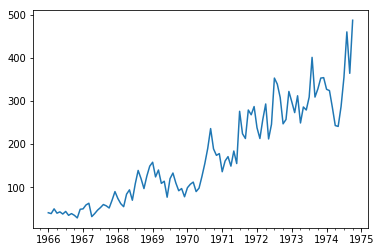

In [20]:
series.plot()
plt.show()

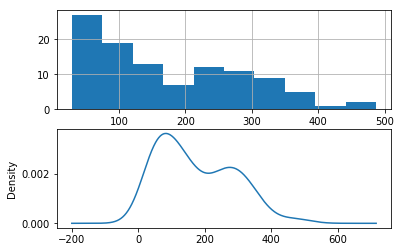

In [21]:
plt.figure(1)
plt.subplot(211)
series.hist()
plt.subplot(212)
series.plot(kind='kde')
plt.show()

In [22]:
from statsmodels.tsa.stattools import adfuller

# create a differe
def difference(dataset):
    diff = list()
    for i in range(1, len(dataset)):
        value = dataset[i] - dataset[i - 1]
        diff.append(value)
    return Series(diff)

X = series.values
# difference data
stationary = difference(X)
stationary.index = series.index[1:]
# check if stationary
result = adfuller(stationary)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
# save
stationary.to_csv('stationary.csv')

ADF Statistic: -3.980946
p-value: 0.001514
Critical Values:
	1%: -3.503
	5%: -2.893
	10%: -2.584


## ARIMA model

In [27]:
from statsmodels.tsa.arima_model import ARIMA
series = Series.from_csv('dataset.csv')
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()

for i in range(len(test)):
    model = ARIMA(history, order=(0,1,2))
    model_fit = model.fit(disp=0)
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))

C:\Users\mxcsy\Anaconda3\lib\site-packages\pandas\core\series.py:3727: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)
C:\Users\mxcsy\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


>Predicted=102.710, Expected=125
>Predicted=118.868, Expected=155
>Predicted=141.099, Expected=190
>Predicted=176.593, Expected=236
>Predicted=233.418, Expected=189
>Predicted=186.905, Expected=174
>Predicted=184.846, Expected=178
>Predicted=183.763, Expected=136
>Predicted=146.180, Expected=161
>Predicted=171.279, Expected=171
>Predicted=170.196, Expected=149
>Predicted=154.425, Expected=184
>Predicted=185.707, Expected=155
>Predicted=157.284, Expected=276
>Predicted=245.280, Expected=224
>Predicted=222.242, Expected=213
>Predicted=219.698, Expected=279
>Predicted=261.506, Expected=268
>Predicted=264.287, Expected=287
>Predicted=282.759, Expected=238
>Predicted=255.843, Expected=213
>Predicted=235.189, Expected=257
>Predicted=257.622, Expected=293
>Predicted=280.345, Expected=212
>Predicted=235.564, Expected=246
>Predicted=255.342, Expected=353
>Predicted=318.613, Expected=339
>Predicted=310.335, Expected=308
>Predicted=306.789, Expected=247
>Predicted=270.213, Expected=257
>Predicted

In [28]:
evaluate(test, predictions)

RMSE: 49.821
